<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/HF_class_Modeling_and_feature_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use("ggplot")
plt.style.use("seaborn")


In [ ]:
df = pd.read_csv("/content/lvef_classification_DataFrame.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
features = {}
columns = df.columns
for i in range(len(columns)):
    features[i] = columns[i]

In [ ]:
X = df.iloc[:,:25].to_numpy()
Y = df['lvef_classification'].to_numpy()

In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.148)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 81.61
Accuracy Train 93.20
ROC-AUC Score 89.81
Recall Score 76.47


<BarContainer object of 25 artists>

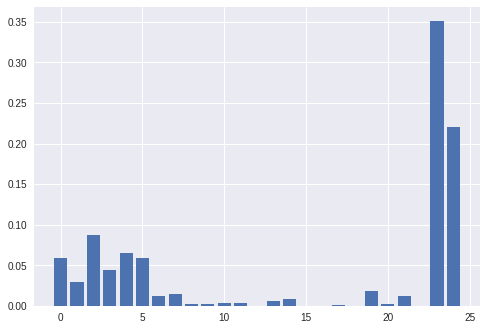

In [ ]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 77.01
Accuracy Train 82.60
ROC-AUC Score 86.98
Recall Score 76.47


Text(0.5, 1.0, 'Feature Importance for XGBoost')

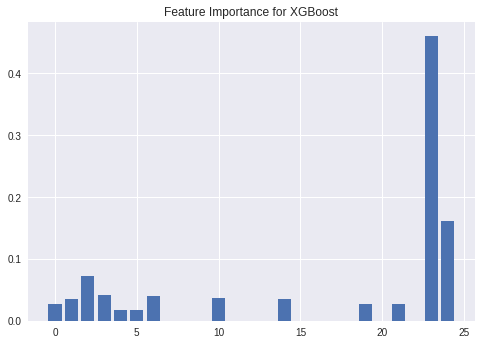

In [ ]:
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)
plt.title("Feature Importance for XGBoost")

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = lgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 77.01
Accuracy Train 100.00
ROC-AUC Score 85.51
Recall Score 74.51


Text(0.5, 1.0, 'Feature Importance for LightGBM')

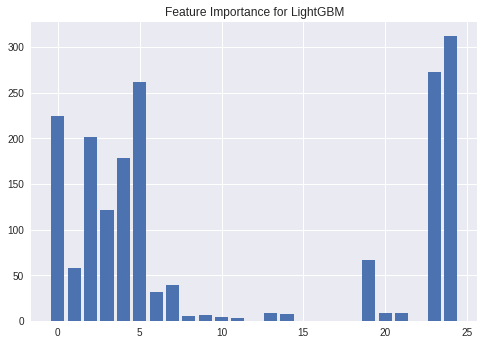

In [ ]:
plt.bar(range(len(lgb.feature_importances_)),lgb.feature_importances_)
plt.title("Feature Importance for LightGBM")

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=1000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)
pred_prob = cgb.predict_proba(x_test)

In [ ]:
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.46
Accuracy Train 95.60
ROC-AUC Score 89.76
Recall Score 76.47


Text(0.5, 1.0, 'Feature Importance for CatBoost')

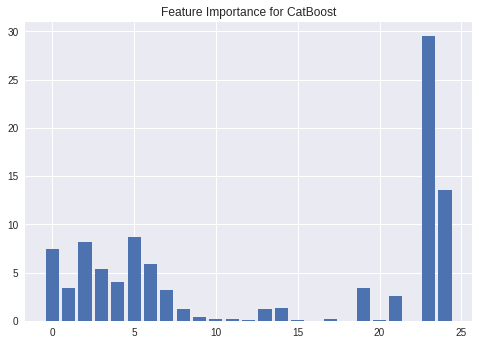

In [ ]:
plt.bar(range(len(cgb.feature_importances_)),cgb.feature_importances_)
plt.title("Feature Importance for CatBoost")

Least Important Features : 9,10,12,13,15,16,17,18,20,22,25

Modeling by removal of these features.

In [ ]:
df = pd.DataFrame(df.to_numpy())

In [ ]:
df.drop(columns=[9,10,12,13,15,16,17,18,20,22,25],inplace=True)

In [ ]:
X = df.to_numpy()

In [ ]:
X.shape

(587, 15)

In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.148)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
least_imp = [9,10,12,13,15,16,17,18,20,22]
x_train = np.delete(x_train,least_imp,axis=1)
x_test = np.delete(x_test,least_imp,axis=1)
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


Accuracy Test 56.32
Accuracy Train 96.60
ROC-AUC Score 59.20
Recall Score 57.45


<BarContainer object of 9 artists>

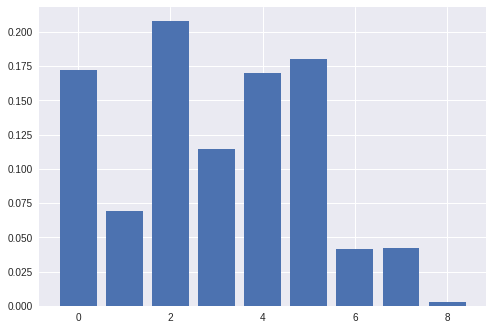

In [ ]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 85.06
Accuracy Train 83.60
ROC-AUC Score 88.57
Recall Score 95.65


Text(0.5, 1.0, 'Feature Importance for XGBoost')

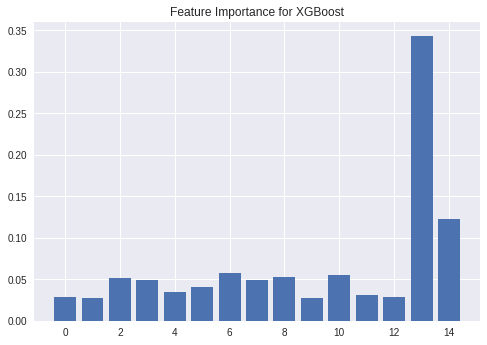

In [ ]:
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)
plt.title("Feature Importance for XGBoost")

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = lgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 82.76
Accuracy Train 100.00
ROC-AUC Score 88.49
Recall Score 89.86


Text(0.5, 1.0, 'Feature Importance for LightGBM')

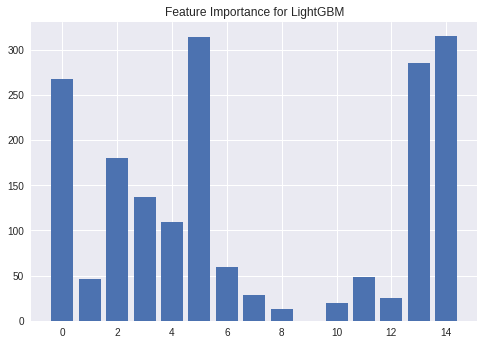

In [ ]:
plt.bar(range(len(df.columns)),lgb.feature_importances_)
plt.title("Feature Importance for LightGBM")

In [ ]:
# Removing all the least important features.
least_imp = [9,10,12,13,15,16,17,18,20,22]
for each in least_imp:
    del features[each]
features

{0: 'pulse',
 1: 'respiration',
 2: 'systolic.blood.pressure',
 3: 'diastolic.blood.pressure',
 4: 'map',
 5: 'BMI',
 6: 'NYHA.cardiac.function.classification',
 7: 'Killip.grade',
 8: 'myocardial.infarction',
 11: 'Chronic.obstructive.pulmonary.disease',
 14: 'moderate.to.severe.chronic.kidney.disease',
 19: 'CCI.score',
 21: 'fio2',
 23: 'left.ventricular.end.diastolic.diameter.LV',
 24: 'brain.natriuretic.peptide'}

Successful Selection of important features
```
With 25 Features on RFClassifier
Accuracy Test  87.36
Accuracy Train 94.20
ROC-AUC Score  88.81
Recall Score   92.75

With 15 Features (Most imp) on RFClassifier
Accuracy Test 87.36
Accuracy Train 95.00
ROC-AUC Score 88.81
Recall Score 92.75
```
Validated by training on 25 features and then removing the leat_imp features from the same set and training again.

In [ ]:
frame = pd.DataFrame(X)
#frame.drop(columns=[9,10,12,13,15,16,17,18,20,22])
frame['lvef_class'] = Y
frame.to_csv("Reduced_Features_set.csv")

In [ ]:
frame.shape

(587, 16)

Most Important Features :
1. Brain Natriuretic Peptide
2. LV end diastolic diameter

----

Testing the Stacking classifier over reduced featues

In [ ]:
x_train.shape

(500, 15)

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3)
estimators = [('rfc',clf),('lgb',LGBMClassifier()),('cat',CatBoostClassifier(iterations=5000),('xgb',XGBRFClassifier()))]
final_estimator = RandomForestClassifier()

clf_stack = StackingClassifier(estimators, final_estimator)
clf_stack.fit(x_train,y_train)

In [ ]:
y_predicted = clf_stack.predict(x_test)
y_train_pred = clf_stack.predict(x_train)
pred_prob = clf_stack.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 83.91
Accuracy Train 91.80
ROC-AUC Score 87.72
Recall Score 94.20


In [ ]:
len(np.where(Y==0)[0])


140

SOLVE THIS ISSUE OF IMBALANCE

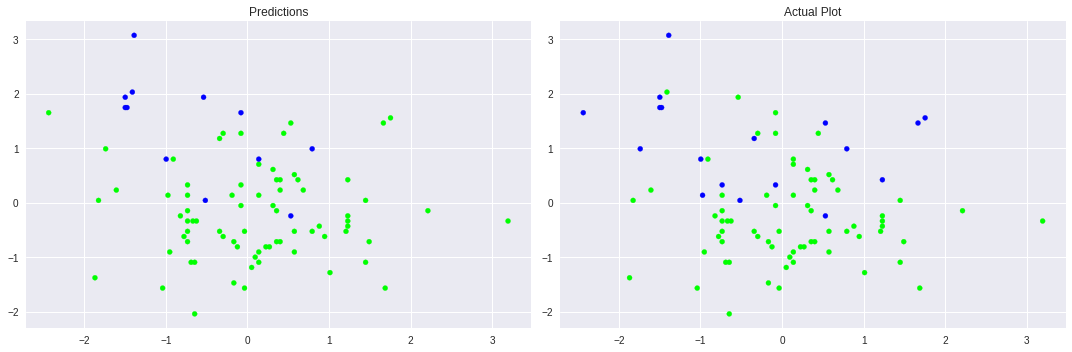

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(x_test[:,4],x_test[:,13],c=y_predicted,cmap='brg',s=25)
axes[1].scatter(x_test[:,4],x_test[:,13],c=y_test,cmap='brg',s=25)
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

Included new Features for explorations :
* High Senstiivity Troponin
* Cholestrol
* Creatine
* Cystanin

In [13]:
df = pd.read_csv("/content/07_with_LVEF_sodium_HST_BNP.csv")
df.drop(columns=['Unnamed: 0','congestive.heart.failure','acute.renal.failure','moderate.to.severe.chronic.kidney.disease','dementia','peptic.ulcer.disease','hemiplegia','connective.tissue.disease','leukemia','AIDS','weight','height'],inplace=True)

In [247]:
df.columns

Index(['pulse', 'respiration', 'systolic.blood.pressure',
       'diastolic.blood.pressure', 'map', 'BMI', 'type.of.heart.failure',
       'NYHA.cardiac.function.classification', 'Killip.grade',
       'myocardial.infarction', 'peripheral.vascular.disease',
       'cerebrovascular.disease', 'Chronic.obstructive.pulmonary.disease',
       'diabetes', 'liver.disease', 'CCI.score', 'type.II.respiratory.failure',
       'fio2', 'LVEF', 'left.ventricular.end.diastolic.diameter.LV',
       'brain.natriuretic.peptide', 'cystatin', 'creatine.kinase',
       'cholesterol', 'creatinine.enzymatic.method', 'sodium', 'potassium',
       'calcium', 'high.sensitivity.troponin'],
      dtype='object')

In [148]:
len(df.columns)

29

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


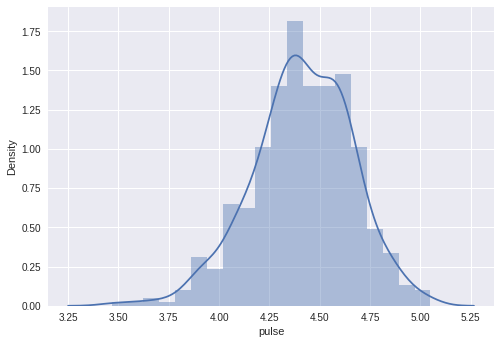

In [233]:
sns.distplot(df['pulse'])

Capping Brain Natriuretic Peptide at 4000 because above it doesn't relate to heart conditions and are same. citation provided

In [14]:
df['brain.natriuretic.peptide'].clip(upper=3000,inplace=True)
df['creatinine.enzymatic.method'].clip(upper=600,inplace=True)

Creatine Kinase above 1000: Refers to idiopathic inflammatory myopathy (IIM) hence we can cap the values to 1000.
Hence to avoid the ouliers capped to 1000.

In [15]:
df['creatine.kinase'].clip(upper=1000,inplace=True)
df['high.sensitivity.troponin'].clip(lower = 0.1,inplace=True)
# To prevent the division by 0

Converting all the numarical distributions to log normals

In [16]:
# centering the normal distributions by converting them to log
for each in df.columns:
    if max(df[each]) > 10 and each != 'LVEF':
        df[each] = np.log(df[each])

First setting cutoff of LVEF : 50 

In [17]:
dfef1 = df.copy()
dfef2 = df.copy()
dfef1['LVEF'].clip(40,41,inplace = True)
dfef1['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef1['LVEF'].replace(to_replace=41,value=int(1),inplace=True)

In [289]:
# Converting to a 3 class encoding
'''
dfef = df.copy()
ejection_fraction = dfef['LVEF'].to_numpy()
for i in range(len(ejection_fraction)):
    if ejection_fraction[i] < 41 :
        ejection_fraction[i] = -1
    elif ejection_fraction[i] > 40 and ejection_fraction[i] < 50:
        ejection_fraction[i] = 0
    else:
        ejection_fraction[i] = 1

dfef1['LVEF'] = ejection_fraction
'''
# 3 class case did not work !!!

In [25]:
df = pd.read_csv("/content/07_with_LVEF_sodium_HST_BNP.csv")
df.drop(columns=['Unnamed: 0','congestive.heart.failure','acute.renal.failure','moderate.to.severe.chronic.kidney.disease','dementia','peptic.ulcer.disease','hemiplegia','connective.tissue.disease','leukemia','AIDS','weight','height'],inplace=True)

df['brain.natriuretic.peptide'].clip(upper=3000,inplace=True)
df['creatinine.enzymatic.method'].clip(upper=600,inplace=True)

df['creatine.kinase'].clip(upper=1000,inplace=True)
df['high.sensitivity.troponin'].clip(lower = 0.1,inplace=True)
# To prevent the division by 0

# centering the normal distributions by converting them to log
for each in df.columns:
    if max(df[each]) > 10 and each != 'LVEF':
        df[each] = np.log(df[each])

dfef1 = df.copy()
dfef2 = df.copy()
dfef1['LVEF'].clip(40,41,inplace = True)
dfef1['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef1['LVEF'].replace(to_replace=41,value=int(1),inplace=True)

Y = dfef1['LVEF'].to_numpy()
X = pd.DataFrame(dfef1.drop(columns = ['LVEF'])).to_numpy()

In [30]:
from sklearn.model_selection import cross_validate
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [32]:
sscaler = preprocessing.StandardScaler().fit(X)
X = sscaler.transform(X)

In [276]:
# Robust Scaler
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
scaler = preprocessing.RobustScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.RobustScaler().fit(x_test)
x_test = scaler.transform(x_test)

sscaler = preprocessing.RobustScaler().fit(X)
X = sscaler.transform(X)

In [65]:
clf = RandomForestClassifier(n_estimators=5000,min_samples_leaf= 7,n_jobs=-1)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.61
Accuracy Train 90.75
ROC-AUC Score 88.51
Recall Score 100.00


In [68]:
cv_rf = cross_validate(clf,X,Y,scoring=('accuracy','roc_auc','recall','precision'),cv = 10,n_jobs=-1)
print("Average CV Accuracy Test \t",(cv_rf['test_accuracy'].mean()*100))
print("Average CV ROC-AUC Score \t",(cv_rf['test_roc_auc'].mean()*100))
print("Average CV Recall Score \t",(cv_rf['test_recall'].mean()*100))
print("Average CV Precision Score \t",(cv_rf['test_precision'].mean()*100))
print("Best Accuracy CV : \t\t", max(cv_rf['test_accuracy']*100))
print("Best ROC CV : \t\t\t", max(cv_rf['test_roc_auc']*100))
print("Best Recall CV : \t\t", max(cv_rf['test_recall']*100))
print("Best Precision CV : \t\t", max(cv_rf['test_precision']*100))

Average CV Accuracy Test 	 80.07227891156464
Average CV ROC-AUC Score 	 85.12468209836629
Average CV Recall Score 	 95.96017069701281
Average CV Precision Score 	 81.32919254658387
Best Accuracy CV : 		 85.71428571428571
Best ROC CV : 			 92.11711711711712
Best Recall CV : 		 100.0
Best Precision CV : 		 84.0909090909091


<BarContainer object of 28 artists>

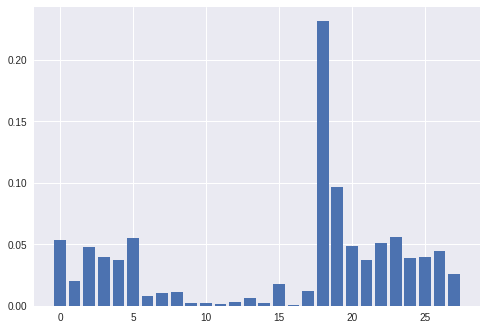

In [306]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

In [66]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier(num_parallel_trees = 1000, n_estimators=5000,num_boost_round = 1000)
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.61
Accuracy Train 84.06
ROC-AUC Score 87.98
Recall Score 95.83


In [67]:
cv_rf = cross_validate(xgb,X,Y,scoring=('accuracy','roc_auc','recall'),cv = 10)
print("Average CV Accuracy Test \n",(cv_rf['test_accuracy'].mean()*100))
print("Average CV ROC-AUC Score \n",(cv_rf['test_roc_auc'].mean()*100))
print("Average CV Recall Score \n",(cv_rf['test_recall'].mean()*100))
print("CV : ", max(cv_rf['test_recall']))

Average CV Accuracy Test 
 80.67602040816327
Average CV ROC-AUC Score 
 85.52275960170697
Average CV Recall Score 
 93.80512091038409
CV :  0.9736842105263158
